In [52]:
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import numpy as np
import math

p = np.zeros(256*2, dtype=np.uint)

def seed(seed):
    permutation = np.arange(256)
    generator = np.random.default_rng(seed)
    generator.shuffle(permutation)
    for i in range(256):
        p[256+i] = p[i] = permutation[i]

def smootherstep(a0,a1,w):
    return  (a1 - a0) * ((w * (w * 6.0 - 15.0) + 10.0) * w * w * w) + a0

def grad(w,x,y):
    match w & 3:
        case 0: 
            return  x + y
        case 1: 
            return -x + y
        case 2:
            return  x - y
        case 3: 
            return -x - y

def noise(x, y):
    x0 = int(math.floor(x))
    y0 = int(math.floor(y))

    X = x0 & 255                        # FIND UNIT CUBE THAT
    Y = y0 & 255                        # CONTAINS POINT.

    xf = x - x0                         # FIND RELATIVE X,Y,Z
    yf = y - y0                         # OF POINT IN CUBE.

    # SHOULD THE ORDER BE FLIPPED?
    BR = p[p[X+1]+Y+1]             # BOTTOM RIGHT / TOP RIGHT
    BL = p[p[X]+Y+1]             # BOTTOM LEFT / TOP LEFT
    TR = p[p[X+1]+Y]             # TOP RIGHT / BOTTOM RIGHT
    TL = p[p[X]+Y]             # TOP LEFT / BOTTOM LEFT

    i0 = smootherstep(grad(TL,xf,yf),grad(TR,xf-1,yf),xf)
    i1 = smootherstep(grad(BL,xf,yf-1),grad(BR,xf-1,yf-1),xf)

    return smootherstep(i0,i1,yf)

def octavePerlin(x, y, octaves, frequency, persistence):
    total = 0
    amplitude = 1
    frequency = frequency
    for _ in range(octaves):
        total += noise(x * frequency, y * frequency)* amplitude
                
        amplitude *= persistence
        frequency *= 2
    
    return (total+1)/2

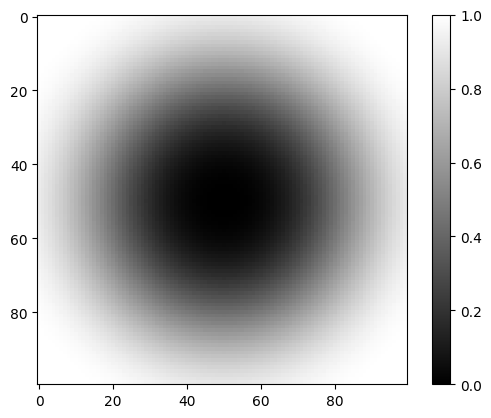

In [57]:
def generate_island_core_map(dim):
    cy = cx = math.floor(dim/2)
    spread = cx * 1.3
    nums = np.ones(dim*dim)
    for y in range(dim):
        for x in range(dim):
            centre = np.array((cx,cy))
            current = np.array((x,y))
            dist = np.linalg.norm(centre - current)
            nums[y*dim+x] = smootherstep(0,1,dist / spread)
    return nums

def plot_island_core(dim):
    map = generate_island_core_map(dim)
    map = np.reshape(map, (dim,dim))
    plt.imshow(map, cmap = "gray", vmin = 0, vmax = 1)
    plt.colorbar()

plot_island_core(100)

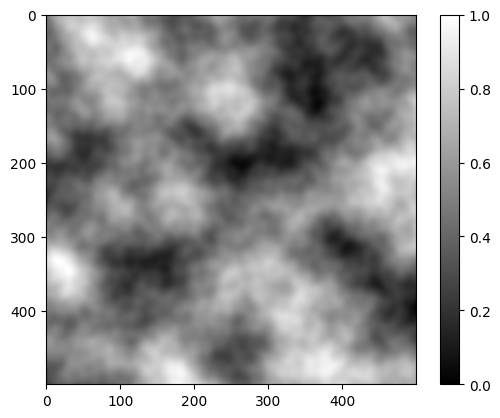

In [51]:
seed(813)

d = 500
nums = np.zeros(d*d)
for y in range(d):
    for x in range(d):
        n = octavePerlin(x,y,4,.007,0.5) 
        nums[y*d+x] = n

nums = np.reshape(nums, (d,d))
plt.imshow(nums, cmap = "gray", vmin = 0, vmax = 1)
plt.colorbar()

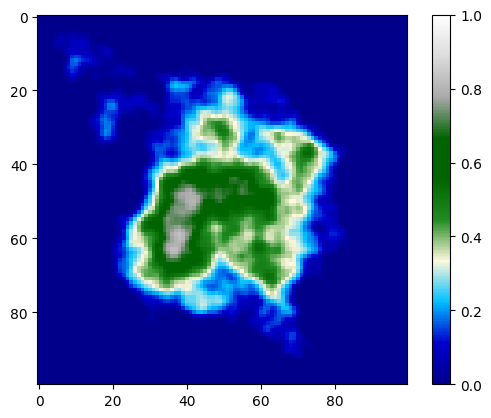

In [137]:
def island_map(d, s, f = .007, p = 0.5):
    seed(s)
    c = generate_island_core_map(d)
    nums = np.zeros(d*d)
    for y in range(d):
        for x in range(d):
            i = y*d+x
            nums[i] = octavePerlin(x,y,4,f,p) - c[i]
    return nums

def plot_map(d, s, f = .007, p = 0.5):
    a_map = pltc.LinearSegmentedColormap.from_list("", ["DarkBlue","MediumBlue","DeepSkyBlue","Cornsilk","ForestGreen","DarkGreen","DarkGreen","DarkGray","Gainsboro","White"])
    map = island_map(d, s, f, p)
    map = np.reshape(map, (d,d))
    plt.imshow(map, cmap = a_map, vmin = 0, vmax = 1)
    plt.colorbar()

plot_map(100,8754,.037)